**Dataset Description**
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea
















**Loading the Dataset**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

**Task A. Basic Data Slicing, Projecting, Querying** (5*5 = 25 Points)

A.0. Show the columns total rooms and median house value.

In [5]:
df[['total_rooms','median_house_value']]

,total_rooms,median_house_value
0,880.0,452600.0
1,7099.0,358500.0
2,1467.0,352100.0
3,1274.0,341300.0
4,1627.0,342200.0
...,...,...
20635,1665.0,78100.0
20636,697.0,77100.0
20637,2254.0,92300.0
20638,1860.0,84700.0


A.1. Generate a dataset that includes districts (rows) with a population above 5000 and a median income greater than $60,000.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
print(df.columns)


df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')


df_filtered = df[(df["population"] > 5000) & (df["median_income"] > 6.0)]


print(df_filtered[["population", "median_income"]])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
       population  median_income
570        7427.0         7.6110
576        5781.0         7.2634
867        5019.0         6.5615
869        6075.0         6.1047
871        7205.0         6.0824
922       12203.0         8.4045
1560       5613.0         6.3942
1700       7266.0         6.0666
1930       5001.0         6.3140
5724       5459.0         8.1657
5921       7665.0         7.9068
5924       7249.0         7.4837
5964       7775.0         7.7876
6055       8686.0         6.3875
6057      15507.0         6.0191
6061       9427.0         6.4266
6063       8380.0         6.2734
6065       9671.0         7.0329
6066      15037.0         6.6288
6328       8907.0         6.1552
7907       5026.0         6.3093
8804       6897.0         8.2831
9004       5452.0         9.123

A.2. Create a dataset that includes districts (rows) for districts with a housing median age below 20 and an average rooms count greater than 5.

In [18]:



df['housing_median_age'] = pd.to_numeric(df['housing_median_age'], errors='coerce')
df['total_rooms'] = pd.to_numeric(df['total_rooms'], errors='coerce')

df['avgRooms'] = df['total_rooms'] / df['households']
df_filtered = df[(df["avgRooms"] > 5) & (df["housing_median_age"] < 20)]


print(df_filtered[["avgRooms", "housing_median_age"]])


       avgRooms  housing_median_age
77     5.830918                19.0
131    8.335052                18.0
437    5.030000                10.0
570    6.855776                 5.0
576    7.133034                12.0
...         ...                 ...
20632  6.023377                15.0
20636  6.114035                18.0
20637  5.205543                17.0
20638  5.329513                18.0
20639  5.254717                16.0

[4088 rows x 2 columns]


A.3. How many rows have a median house value greater than $500,000?

In [22]:
rows=df[df['median_house_value'] > 5.0]
# Count the number of rows that meet the condition
num_high_value_houses = rows.shape[0]

# Print the number of rows
print(f'Number of rows : {num_high_value_houses}')




Number of rows : 20640


A.4. What is the average population of districts (rows) where the median income is above $70,000?

In [24]:
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')


highIncome = df[df['median_income'] > 7.0]


average_population = highIncome['population'].mean()

print(f'Average population: {average_population}')

Average population: 1292.0391993327773


A.5. What is the average number of bedrooms in districts with a median income between \$40,000 and \$60,000?

In [25]:
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['total_bedrooms'] = pd.to_numeric(df['total_bedrooms'], errors='coerce')

highIncome = df[(df['median_income'] >= 4.0) & (df['median_income'] <= 6.0)]


averageNoOfBedroom= highIncome['total_bedrooms'].mean()

print(f'Average Number of bedroom: {averageNoOfBedroom}')



Average Number of bedroom: 551.0693155960091


A.6. How many rows have a housing median age of less than 25 years and a median house value greater than $300,000?

In [27]:
df['housing_median_age'] = pd.to_numeric(df['housing_median_age'], errors='coerce')
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')

# Filter the dataset: housingMedianAge < 25 and medianHouseValue > 300000
filtered_df = df[(df['housing_median_age'] < 25) & (df['median_house_value'] > 300000)]

# Count the number of rows that meet the conditions
num_rows = filtered_df.shape[0]

# Print the number of rows
num_rows

1207

A.7. Among rows with a median income above $60,000, which district has the highest average rooms count and lowest median house value?

In [29]:
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['total_rooms'] = pd.to_numeric(df['total_rooms'], errors='coerce')
df['households'] = pd.to_numeric(df['households'], errors='coerce')
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')

districts = df[df['median_income'] > 6.0]

districts['avgRooms'] = districts['total_rooms'] / districts['households']

max_avg_rooms = districts['avgRooms'].max()
district_max_avg_rooms = districts[districts['avgRooms'] == max_avg_rooms]


min_median_house_value = district_max_avg_rooms['median_house_value'].min()
result_district = district_max_avg_rooms[district_max_avg_rooms['median_house_value'] == min_median_house_value]

# Display the result
print("District with the highest average rooms count and lowest median house value among those with a median income above $60,000:")
print(result_district)

District with the highest average rooms count and lowest median house value among those with a median income above $60,000:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12430    -116.26     33.65                 3.0       7437.0          1222.0   

       population  households  median_income  median_house_value  \
12430       574.0       302.0        10.2948            382400.0   

      ocean_proximity   avgRooms  
12430          INLAND  24.625828  


<ipython-input-29-cb30313430d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['avgRooms'] = districts['total_rooms'] / districts['households']


A.8. How many rows have a median income that falls within the 75th percentile of all districts and also have a housing median age greater than the median age of all districts?

In [34]:
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['housing_median_age'] = pd.to_numeric(df['housing_median_age'], errors='coerce')

Percentile = df['median_income'].quantile(0.75)

housingAge = df['housing_median_age'].median()

filtered_df = df[(df['median_income'] >= Percentile) & (df['housing_median_age'] > housingAge)]

num_rows = filtered_df.shape[0]


print(f'Number of rows: {num_rows}')

Number of rows: 1993


A.9.  What is the average median house value for districts (rows) where the average distance to the five nearest jobs is above 5 kilometers and the median income is below $50,000?

In [43]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')


x = df[(df['latitude'] >5) & (df['median_income'] <5.0)]
average_median_house_value = filtered_df['median_house_value'].mean()
print(f'Average median house value : {average_median_house_value}')

Average median house value : 353936.7185148018


A.10. What is the median house value for districts (rows) that have a low population density (population divided by total rooms) and are located near jobs (within 5 kilometers of the five nearest jobs)?

In [47]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')
df['total_rooms'] = pd.to_numeric(df['total_rooms'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')

df['populationDensity'] = df['population'] / df['total_rooms']

filtered_df = df[(df['populationDensity'] < 0.1) & (df['latitude'] < 5)]

median_house_value = filtered_df['median_house_value'].median()

print(f"Median house value: {median_house_value}")

Median house value: nan


**Task B. Data Visulation** (15 Points)

B.1. Use a suitable visualization method to show that the distribution of median house values vary across different housing median ages.

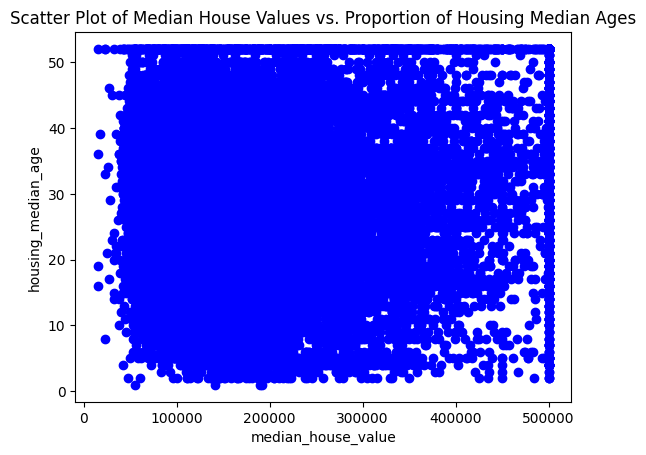

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['median_house_value'], df['housing_median_age'], color='b')

# Add labels and title
plt.xlabel('median_house_value')
plt.ylabel('housing_median_age')
plt.title('Scatter Plot of Median House Values vs. Proportion of Housing Median Ages')

# Show the plot
plt.show()



B.2. How does the correlation between median income and median house values change as the housing median age increases?

*Hints:* Calculate the correlation coefficient between median income and median house values for different housing median age categories (e.g., bins of 5 years) and then plot using suitable visualization method.

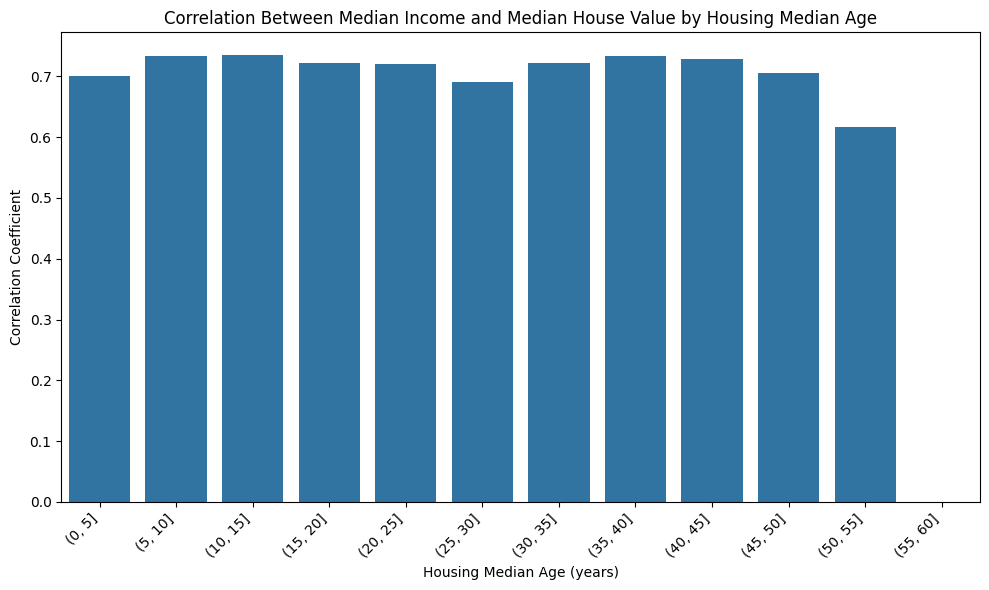

In [48]:
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Create a new column to categorize housing median age
df['age_category'] = pd.cut(df['housing_median_age'], bins=age_bins)

correlation_data = df.groupby('age_category').apply(lambda x: x['median_income'].corr(x['median_house_value'])).reset_index(name='correlation')

# Plot the correlation coefficients against housing median age categories
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='correlation', data=correlation_data)
plt.title('Correlation Between Median Income and Median House Value by Housing Median Age')
plt.xlabel('Housing Median Age (years)')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Task C. Hypothesis Testing** (15 Points)

C.1.  Is there a statistically significant difference in median house values among districts with different types of ocean proximity (near bay, near ocean, etc.)?

*Hints*

Hypothesis Test: ANOVA Test

**Group the districts based on their ocean proximity types (e.g., 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND').
Perform an ANOVA test to determine if there is a statistically significant difference in median house values among these groups.**

In [51]:
from scipy.stats import f_oneway

# Load the dataset (assuming it's a CSV file named 'housing.csv')
df = pd.read_csv('housing.csv')

# Group the districts based on their ocean proximity types
ocean_proximity_groups = df.groupby('ocean_proximity')['median_house_value'].apply(list)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*ocean_proximity_groups)

# Print the results
print(f'ANOVA Test Results:')
print(f'F-Statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('We can reject the null hypothesis')
else:
    print('We can accept the null hypothesis')

ANOVA Test Results:
F-Statistic: 1612.1407358838217
p-value: 0.0
We can reject the null hypothesis


**Task D. Linear Regression Model** (20 Points)

D.1. Can you build a linear regression model to predict median house values based on the median income, housing median age, and average number of rooms in a district?
Linear Regression Task: Multiple Linear Regression

Predictor Variable: median income (X1), housing median age (X2), and average number of rooms (X3)

Response Variable: Median house values (Y)

**Task: Build a multiple linear regression model Y = a + b1X1 + b2X2 + b3X3  from scratch. Show the value of the weights.**

In [52]:

X1 = df['median_income'].values
X2 = df['housing_median_age'].values
X3 = df['total_rooms'].values
Y = df['median_house_value'].values

# Compute the means
X1_mean = np.mean(X1)
X2_mean = np.mean(X2)
X3_mean = np.mean(X3)
Y_mean = np.mean(Y)

# Compute the coefficients using OLS method
b1 = np.sum((X1 - X1_mean) * (Y - Y_mean)) / np.sum((X1 - X1_mean) ** 2)
b2 = np.sum((X2 - X2_mean) * (Y - Y_mean)) / np.sum((X2 - X2_mean) ** 2)
b3 = np.sum((X3 - X3_mean) * (Y - Y_mean)) / np.sum((X3 - X3_mean) ** 2)
a = Y_mean - b1 * X1_mean - b2 * X2_mean - b3 * X3_mean

# Show the value of the weights
print(f'Intercept (a): {a}')
print(f'Coefficient for median income (b1): {b1}')
print(f'Coefficient for housing median age (b2): {b2}')
print(f'Coefficient for average number of rooms (b3): {b3}')


Intercept (a): -1353.6251831560476
Coefficient for median income (b1): 41793.84920189626
Coefficient for housing median age (b2): 968.4496397427555
Coefficient for average number of rooms (b3): 7.095972205890664
